In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
pricedf = pd.read_csv('Dataset/Position_Salaries.csv')
pricedf

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [25]:
pricedf.shape

(10, 3)

In [26]:
x = pricedf.iloc[:,[1]].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [27]:
y = pricedf.iloc[:,-1].values
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [28]:
pricedf.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg= PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
regressor=LinearRegression()
regressor.fit(x_poly,y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [30]:
y_pred = regressor.predict(poly_reg.fit_transform(x_test))
print(y_pred) # comparison predict
print(y_test) # and actual

[ 94960.37296037 575694.63869464]
[ 60000 500000]


In [31]:
corr = np.corrcoef(y_pred, y_test)
print(corr) # check correlation between predicted and actual.

[[1. 1.]
 [1. 1.]]


In [32]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print(MSE)

3475953002.3199396


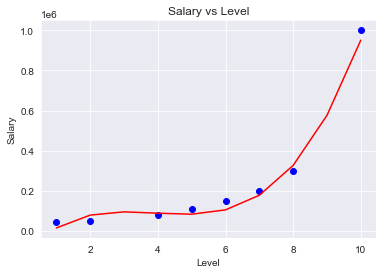

In [34]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x, regressor.predict(poly_reg.fit_transform(x)), color='red')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()